In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_excel("CW_Data.xlsx")

# 移除索引列
data = data.drop('Index', axis=1)

data.shape

(619, 10)

In [2]:
X = data.drop(['Programme'], axis=1)
y = data['Programme']
color_indices = data["Programme"]
print(X.shape)
print(y.shape)

(619, 9)
(619,)


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pca = PCA(n_components=2)
X = StandardScaler().fit_transform(data.values)
principalComponents = pca.fit_transform(X)

In [4]:
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# 缩放主成分范围到 [-10, 10]
new_min = -10
new_max = 10
scaler = MinMaxScaler(feature_range=(new_min, new_max))
principalDf[['PC1', 'PC2']] = scaler.fit_transform(principalDf[['PC1', 'PC2']])

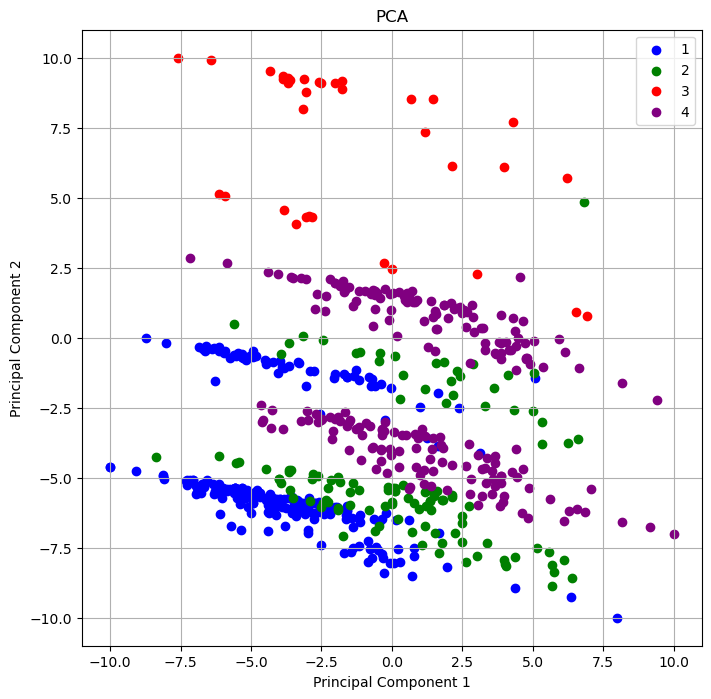

In [5]:
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(8, 8))
for category, color in zip(range(1, 5), colors):
    indicesToKeep = color_indices == category
    plt.scatter(principalDf.loc[indicesToKeep, 'PC1'], principalDf.loc[indicesToKeep, 'PC2'], c=color, label=category)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.grid(True)
plt.legend()
plt.show()